# A Short Study in Under and Overfitting
<pre>
L. Van Warren, May 2018

Skip to the last panel to use the application,
the intermediate steps are for development, verification, and testing.
</pre>

In [12]:
from ipywidgets import *
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.integrate import trapz, simps
np.set_printoptions(precision=1)
np.set_printoptions(suppress=True) # suppress scientific notation for small numbers
%matplotlib inline


In [13]:
def f(u):  # This is our "exact" model of some real world behavior
    return np.sin(6*u) + 3*u**2 - 2*(u)**3
    # return 3*u**2 - 2*(u)**3  # exact fit for testing
def F():   # The definite integral of f(u) between 0 and 1
    return -(np.cos(6)-4)/6
    # return 1/2                # exact fit for testing
print(f(0.5))
print(F()) # Variable gets integrated away in definite integral

0.6411200080598672
0.5066382855582724


<b> f(u) represents some real world behavior.</b><br>
We can plot this behavior
and map it to the unit interval in y,
making the assumption that the behavior is normalizeable.
We normalize the data and compute the extrema for subsequent processing.

In [14]:
def gen_x():
    return np.linspace(0, 1, 1025)

In [15]:
def comp_behavior():
    x = gen_x()
    y = f(x)
    y_min = y.min()
    y_max = y.max()
    y = (y-y_min)/(y_max-y_min) # map to unit interval
    return x, y, y_min, y_max

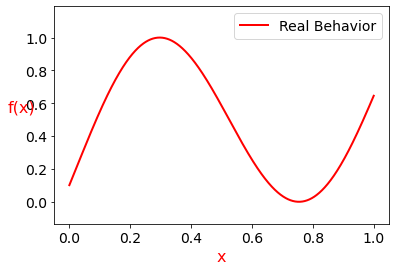

In [16]:
def plot_real_behavior():
    x, y, y_min, y_max = comp_behavior()
    plt.ylim(y_min,y_max)
    plt.plot(x, y,'r', lw=2, label='Real Behavior')
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.xlabel('x',fontsize=16,color='r')
    plt.ylabel('f(x)',fontsize=16, color='r',rotation=0)
    return y_min, y_max
y_min, y_max = plot_real_behavior()
plt.legend(loc='best',fontsize=14)
plt.show()

<b> f(u) is a point sampled/measured with bounded noise.</b><br>
We simulate the noise of real measurements and the process of discretely sampling a continuous real-world model. Of course our real-world model is also discrete, but it has so many more underlying samples it is psuedo-continuous and quite adequate for making our point.
We seed the random number generator so we can the same result each time.

In [29]:
def meas_behavior(noise_level, y_min, y_max, samples):
    np.random.seed(42)
    xS = np.linspace( 0.0, 1.0,  samples)
    yS = f(xS) + noise_level*np.random.randn(len(xS))
    yS = (yS-y_min)/(y_max-y_min) # map to unit interval
    return xS, yS

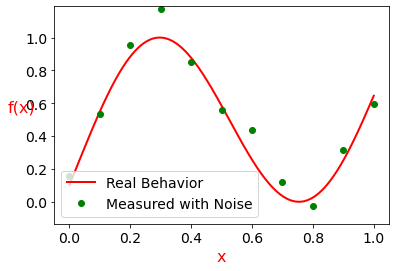

In [30]:
def plot_meas_behavior(noise_level, y_min, y_max, samples):
    xS, yS = meas_behavior(noise_level, y_min, y_max, samples)
    plt.plot(xS, yS, 'g.', ms=12, label='Measured with Noise')
def plot_real_and_meas_behavior(noise_level, samples):
    y_min, y_max = plot_real_behavior()
    xS, yS = meas_behavior(noise_level, y_min, y_max, samples)
    plot_meas_behavior(noise_level, y_min, y_max, samples)
    return xS, yS
xS, yS = plot_real_and_meas_behavior(0.15, 11)
plt.legend(loc='best',fontsize=14)
plt.show()

In [31]:
interact(plot_real_and_meas_behavior, noise_level=(0.0,1,0.1), samples=(5,50,5));

interactive(children=(FloatSlider(value=0.5, description='noise_level', max=1.0), IntSlider(value=25, descript…

In [33]:
undr = 0
over = 2
def under_and_overfit(xS, yS, undr, over):
    cU = np.polyfit(xS, yS, undr)
    cO = np.polyfit(xS, yS, over)
    pU = np.poly1d(cU)
    pO = np.poly1d(cO)
    return cU, cO, pU, pO

cU, cO, pU, pO = under_and_overfit(xS, yS, undr, over)

def eval_unit_integral(p):
    x = gen_x()
    y = p(x)
    return(simps(y,x))  

def eval_resi_integral(p):
    x = gen_x()
    y = f(x) - p(x)
    return(simps(y,x))  

print(eval_unit_integral(pU))
print(eval_unit_integral(pO))


0.5150795614863936
0.5335806934698542


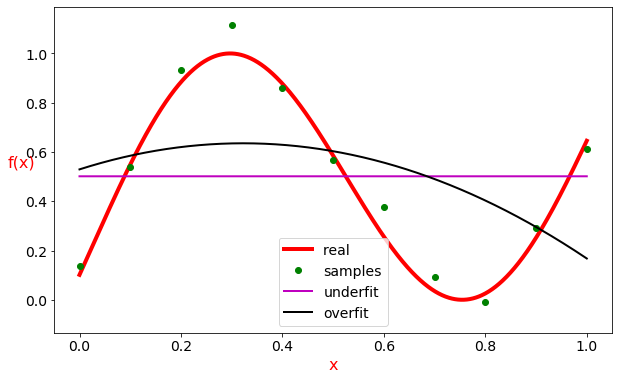

area under     true curve:  0.5066382855582724
area under underfit curve:  0.5012889881481419
area under  overfit curve:  0.518267330401013
error in   underfit curve:   0.53%
error in    overfit curve:  -1.16%


In [34]:
def plot_under_and_overfit(undr, over, noise_level, samples):
    x, y, y_min, y_max = comp_behavior()
    xS, yS = meas_behavior(noise_level, y_min, y_max, samples)
    cU, cO, pU, pO = under_and_overfit(xS, yS, undr, over)
    plt.figure(figsize=(10,6))
    plt.ylim(y_min,y_max)
    plt.plot(x, y,  'r', lw=4, label='real ')
    plt.plot(xS, yS, 'g.', ms=12, label='samples')
    plt.plot(x, pU(x), 'm', lw=2, label='underfit')
    plt.plot(x, pO(x), 'k', lw=2, label='overfit')
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.xlabel('x',fontsize=16,color='r')
    plt.ylabel('f(x)',fontsize=16, color='r',rotation=0)
    plt.legend(loc='lower center',fontsize=14)
    plt.show()
    print("area under     true curve: ", F())
    print("area under underfit curve: ", eval_unit_integral(pU))
    print("area under  overfit curve: ", eval_unit_integral(pO))
    print('error in   underfit curve: {:6.2f}%'.format(100*eval_resi_integral(pU)))
    print('error in    overfit curve: {:6.2f}%'.format(100*eval_resi_integral(pO)))
plot_under_and_overfit(undr, over, 0.1, 11)

In [35]:
interact(plot_under_and_overfit, undr=(0,10,1),
                                 over=(1,18,1),
                                 noise_level=(0.0,1.0,0.05),
                                 samples=(8,64,4));

interactive(children=(IntSlider(value=5, description='undr', max=10), IntSlider(value=9, description='over', m…